### Fit S21 traces for R3_F1_4p78

In [1]:
from pathlib import Path
from rrfit.hangerfit import fit_s21_v2
from betata.resonator_studies.trace import Trace, load_traces, save_traces

CWD = Path.cwd()

Specify input folder and output file

In [2]:
resonator_name = "R3_F1_4p78"
input_folder = CWD / f"data/resonator_studies/{resonator_name}"
output_file = CWD / f"out/resonator_studies/{resonator_name}.h5"

Load traces

In [3]:
traces: list[Trace] = load_traces(input_folder)

Fit traces

[[Model]]
    Model(S21Model)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 30
    # data points      = 480
    # variables        = 4
    chi-square         = 0.00104376
    reduced chi-square = 2.1928e-06
    Akaike info crit   = -6250.58265
    Bayesian info crit = -6233.88751
    R-squared          = np.complex128(1.0000033534583885+3.8163260393535625e-05j)
[[Variables]]
    fr:     4.7769e+09 +/- 16.2726943 (0.00%) (init = 4.776906e+09)
    Ql:     45201.7697 +/- 13.9205126 (0.03%) (init = 47947.75)
    absQc:  45587.2368 +/- 12.1822426 (0.03%) (init = 48356.13)
    phi:    0.99600185 +/- 2.6723e-04 (0.03%) (init = 0.9960023)
    a:      1 (fixed)
    alpha:  0 (fixed)
    tau:    0 (fixed)
    Qi:     98065.4566 +/- 63.2727471 (0.06%) == '1 / ((1 / Ql) - (cos(phi) / absQc))'
[[Correlations]] (unreported correlations are < 0.100)
    C(fr, phi)   = -0.8677
    C(Ql, absQc) = +0.8677


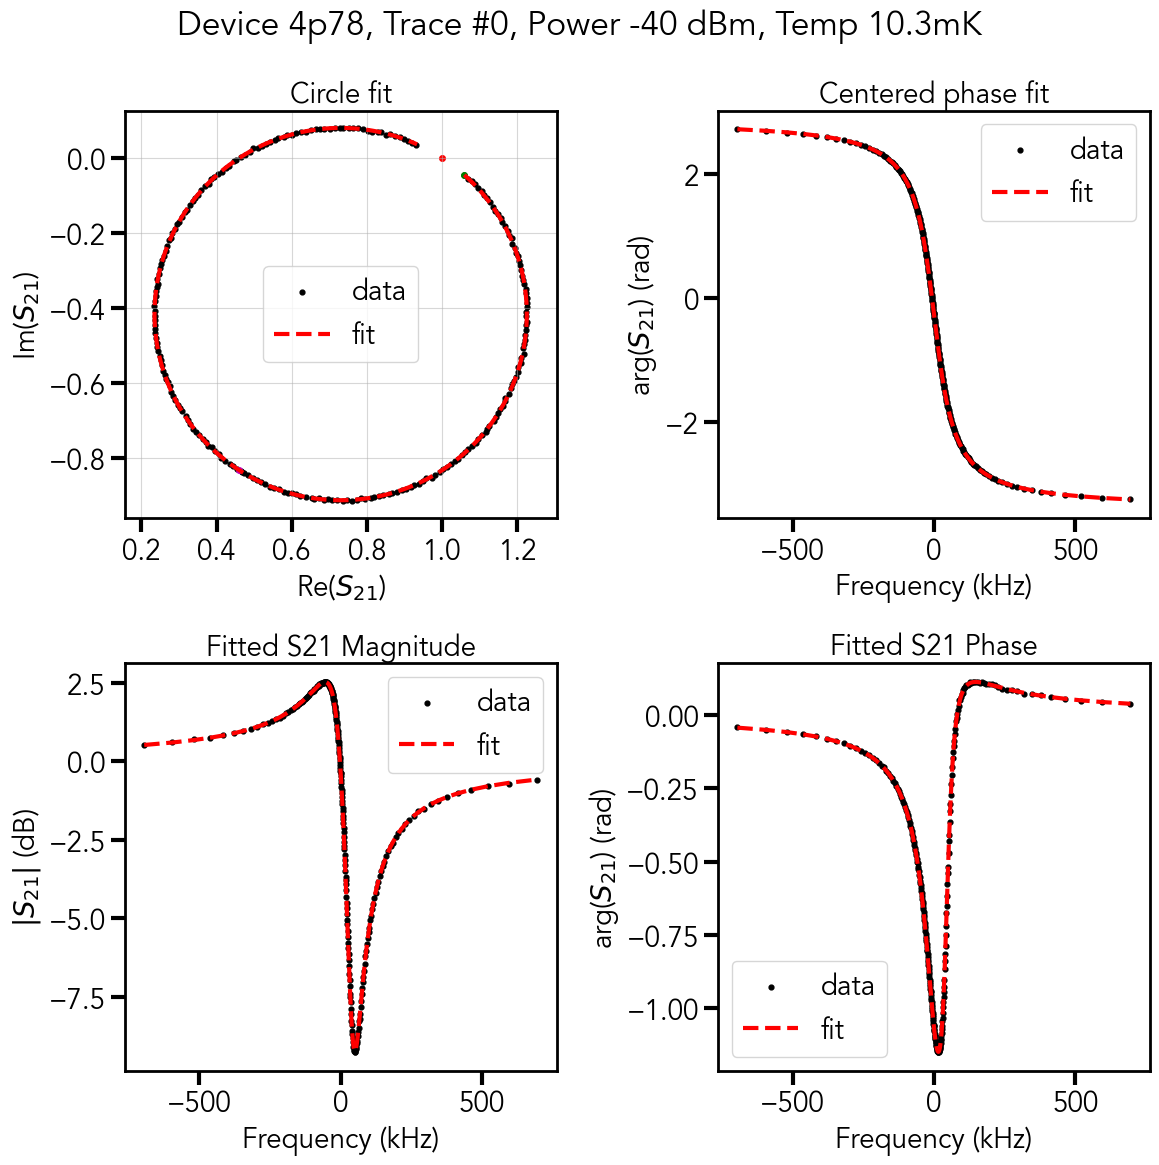

In [4]:
for trace in traces:
    plot_title = f"Device {trace.resonator_name}, Trace #{trace.id}, Power {trace.power} dBm, Temp {trace.temperature * 1e3:.1f}mK"
    fit_s21_v2(trace, plot_title=plot_title)

Exclude traces

In [5]:
traces_to_exclude = []
for trace in traces:
    if trace.id in traces_to_exclude:
        trace.is_excluded = True
    else:
        trace.is_excluded = False

Save fitted traces

In [6]:
save_traces(traces, output_file)